# RNN for Stock Price Prediction

### Importing the data from Yahoo Finance

In [1]:
!pip install -q yfinance

### Loading the Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']


tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-09,142.020004,142.649994,139.839996,140.600006,140.600006,36235400,AMAZON
2023-11-10,140.460007,143.649994,139.910004,143.559998,143.559998,49287800,AMAZON
2023-11-13,142.080002,143.229996,140.669998,142.589996,142.589996,35680600,AMAZON
2023-11-14,145.000000,147.259995,144.679993,145.800003,145.800003,56674600,AMAZON
2023-11-15,147.059998,147.289993,142.589996,143.199997,143.199997,63875700,AMAZON
2023-11-16,140.910004,143.320007,139.520004,142.830002,142.830002,49653500,AMAZON
2023-11-17,142.660004,145.229996,142.539993,145.179993,145.179993,49636700,AMAZON
2023-11-20,145.130005,146.630005,144.729996,146.130005,146.130005,41951200,AMAZON
2023-11-21,143.910004,144.050003,141.500000,143.899994,143.899994,71226000,AMAZON


### Summary of the data of every Company

In [3]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,166.885001,168.542720,165.504800,167.114160,166.608965,6.208790e+07
std,18.545550,18.376107,18.713457,18.535041,18.686148,1.866684e+07
min,126.010002,127.769997,124.169998,125.019997,124.325089,3.145820e+07
25%,151.212502,153.417496,150.277496,151.777496,151.009537,4.953542e+07
50%,172.139999,173.650002,170.949997,172.485001,172.141853,5.745680e+07
75%,180.070007,181.465004,178.017494,180.017498,179.598736,6.918645e+07
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.601569e+08


In [4]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,115.029340,116.508372,113.901176,115.271020,115.271020,2.560409e+07
std,16.986234,17.006429,16.947603,16.971680,16.971680,1.067942e+07
min,86.720001,88.209999,85.570000,86.459999,86.459999,8.567800e+06
25%,99.070002,101.104998,97.594999,99.870003,99.870003,1.930638e+07
50%,120.134998,121.234997,119.035000,120.114998,120.114998,2.271505e+07
75%,130.427498,131.937500,129.486252,130.407497,130.407497,2.825312e+07
max,142.160004,142.380005,139.839996,141.699997,141.699997,9.779860e+07


In [5]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,300.909000,304.045041,297.979639,301.131601,299.697952,2.790179e+07
std,40.408422,40.489267,40.203741,40.288463,40.749744,1.079231e+07
min,223.000000,225.759995,219.350006,222.309998,220.356125,9.200800e+06
25%,258.962509,262.922501,255.984997,258.132500,256.167709,2.129735e+07
50%,314.930008,318.565002,313.164993,315.505005,314.533585,2.507020e+07
75%,332.760002,336.067490,329.117508,332.330009,331.178322,2.996060e+07
max,378.000000,379.790009,374.970001,377.850006,377.850006,8.610200e+07


In [6]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,115.240600,116.773760,113.753440,115.343240,115.343240,6.151636e+07
std,18.688815,18.723578,18.646868,18.689683,18.689683,2.135427e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,2.826480e+07
25%,98.117500,99.324999,96.317501,98.060001,98.060001,4.759025e+07
50%,117.465000,120.049999,116.179996,118.860001,118.860001,5.675740e+07
75%,131.082500,132.907501,129.330002,131.420002,131.420002,7.013298e+07
max,147.059998,147.740005,144.729996,146.710007,146.710007,1.581542e+08


### Additional Info of the Data

In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-11-25 to 2023-11-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


In [8]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-11-25 to 2023-11-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


In [9]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-11-25 to 2023-11-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


In [10]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-11-25 to 2023-11-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


Knowiing the price end of the stock period

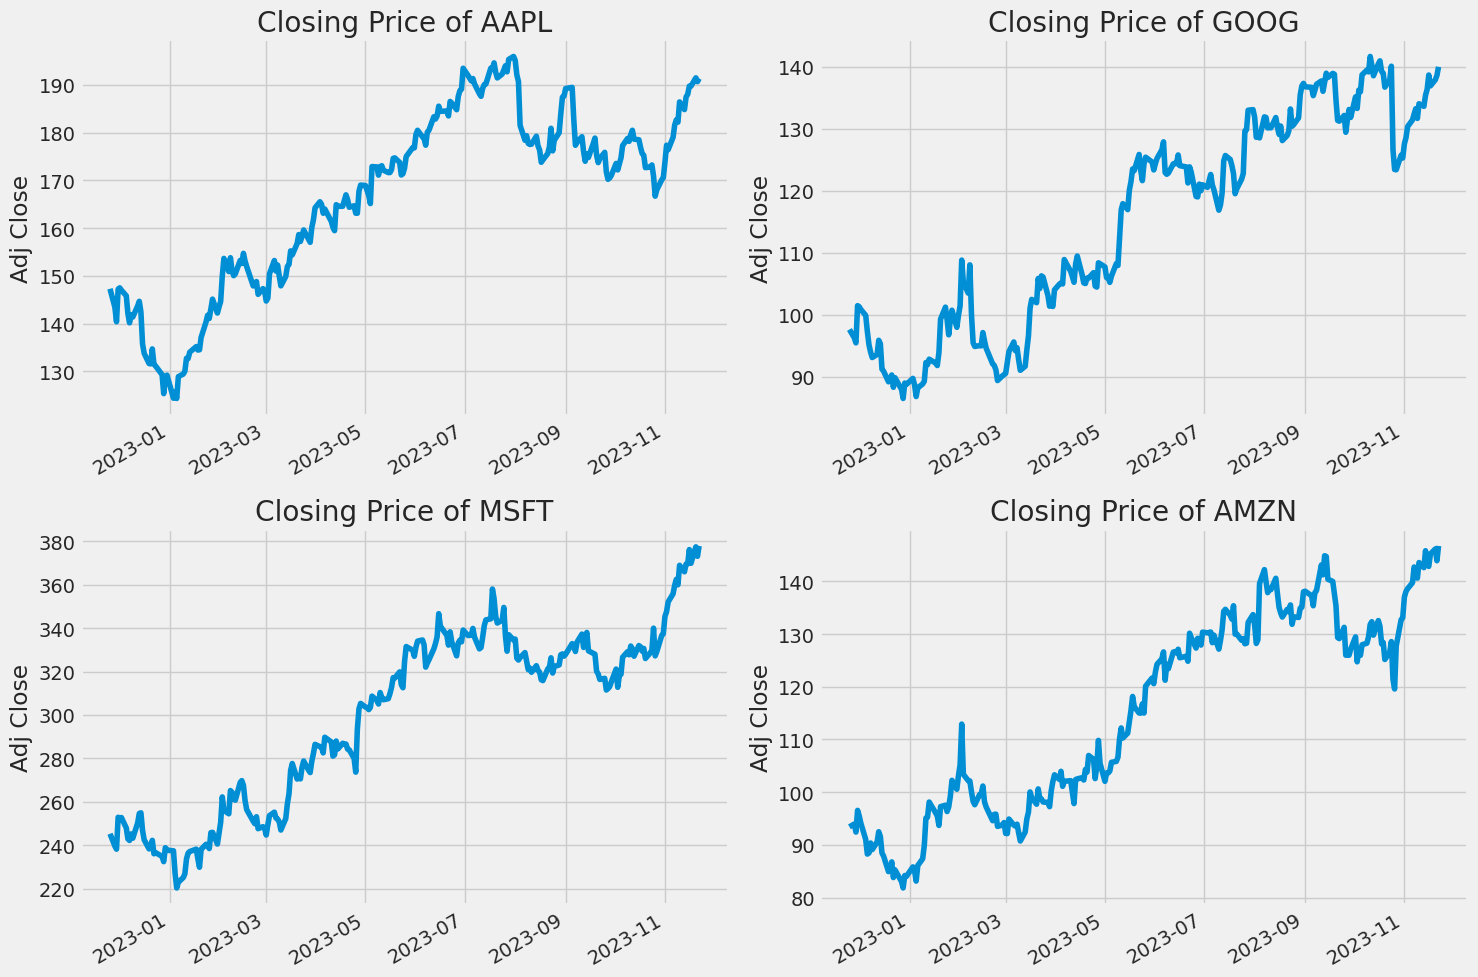

In [11]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

Knowing the amount of Sales

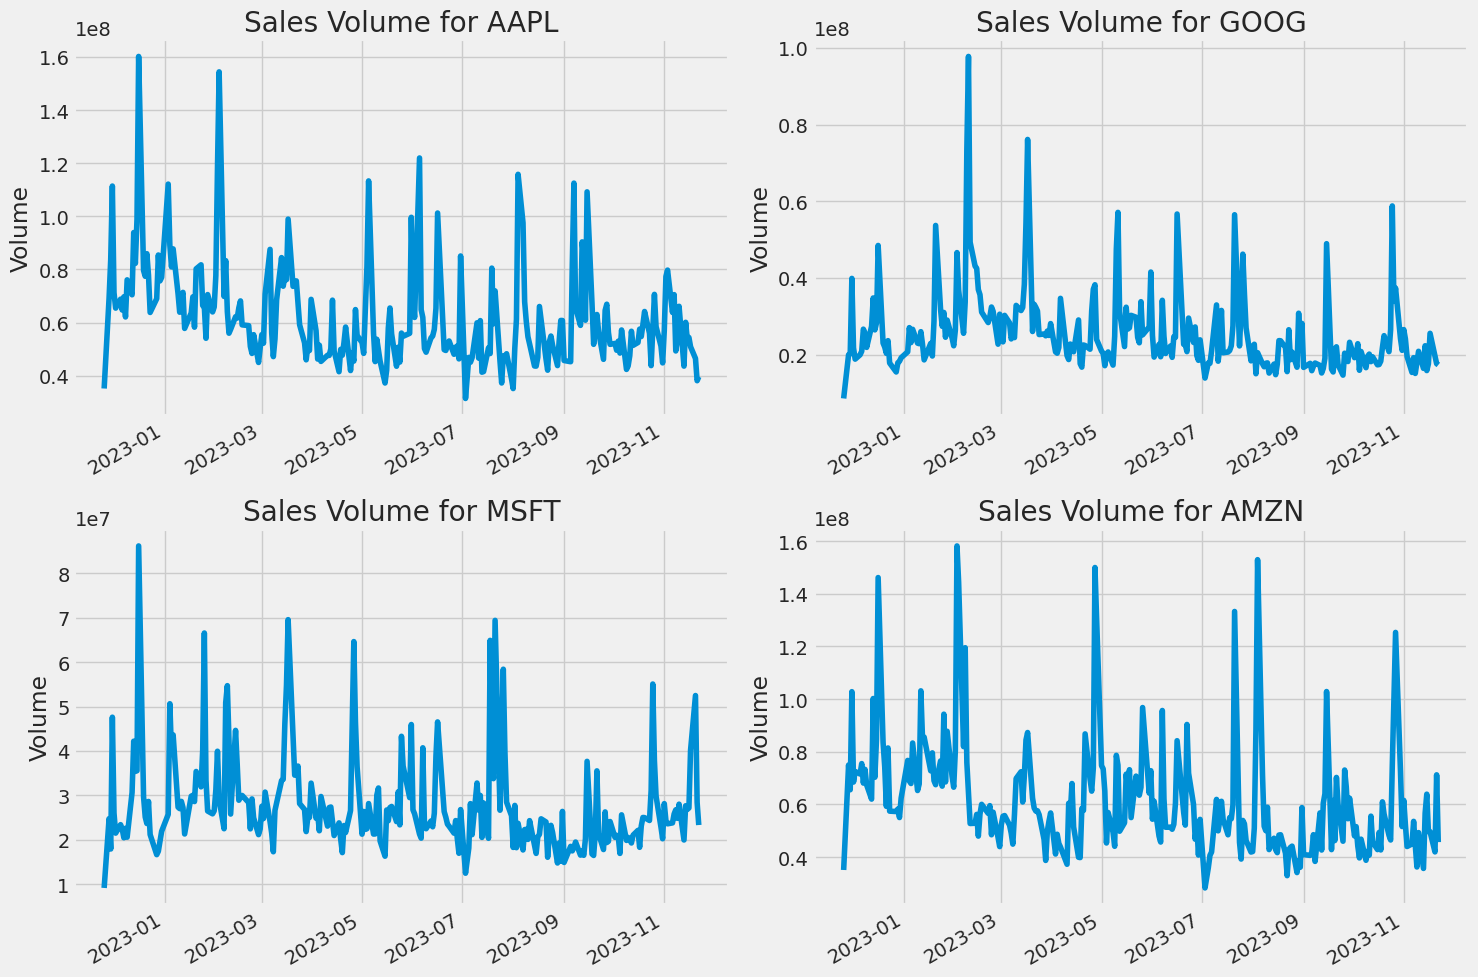

In [12]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

### knowing how much the moving stocks are there in an average

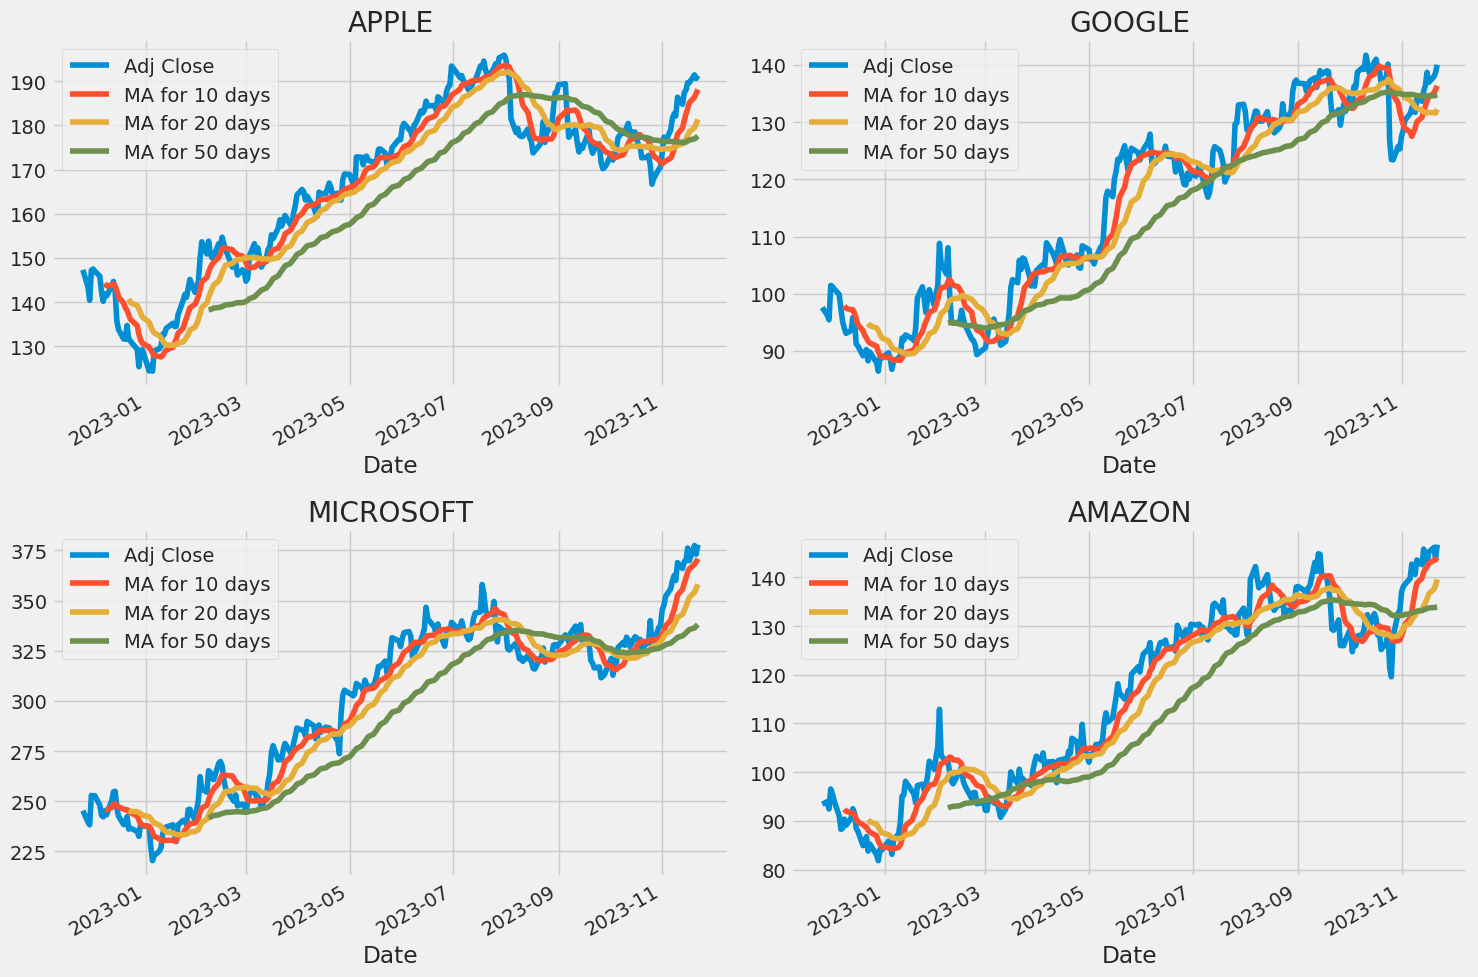

In [13]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

### Return of stock on an average on regular basis

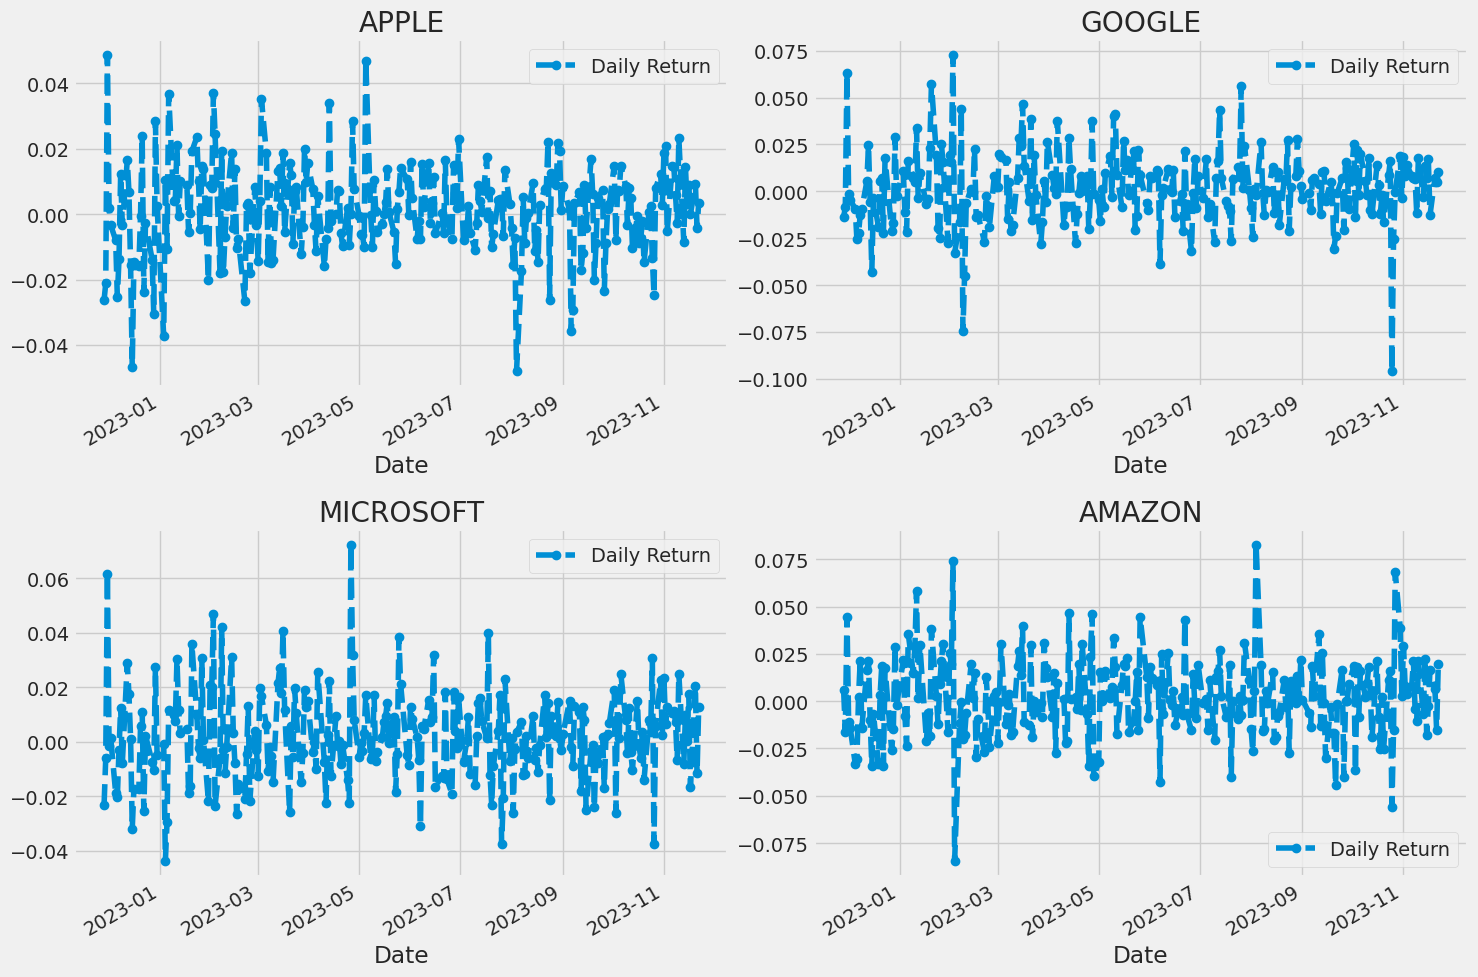

In [14]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

### Getting to know the corelation of the stocks

In [15]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-11-25,NaN,NaN,NaN,NaN
2022-11-28,-0.026264,0.005781,-0.013832,-0.023152
2022-11-29,-0.021148,-0.016285,-0.008416,-0.005915
2022-11-30,0.048594,0.044579,0.062971,0.061623
2022-12-01,0.001891,-0.010773,-0.001676,-0.001764


camoparison of a company with itself to get a linear relation

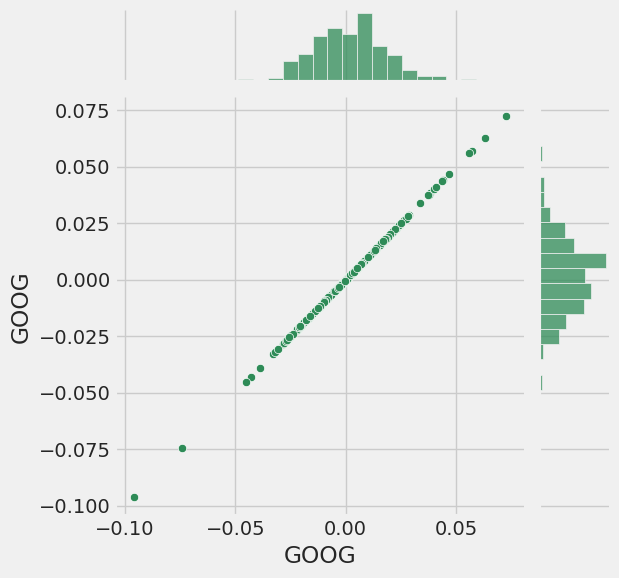

In [16]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

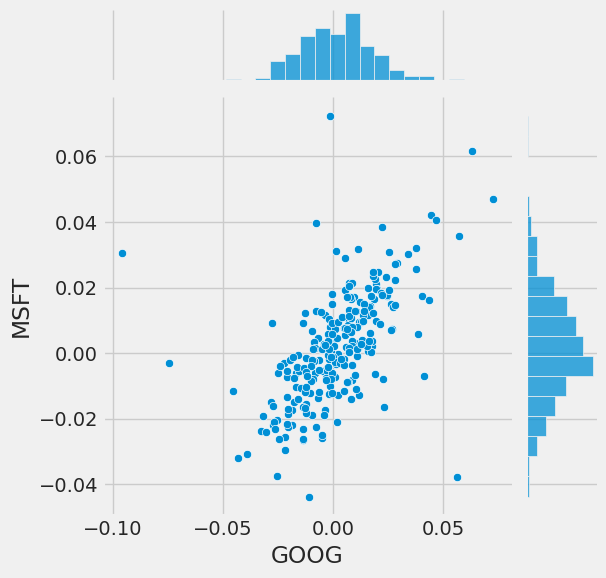

In [17]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

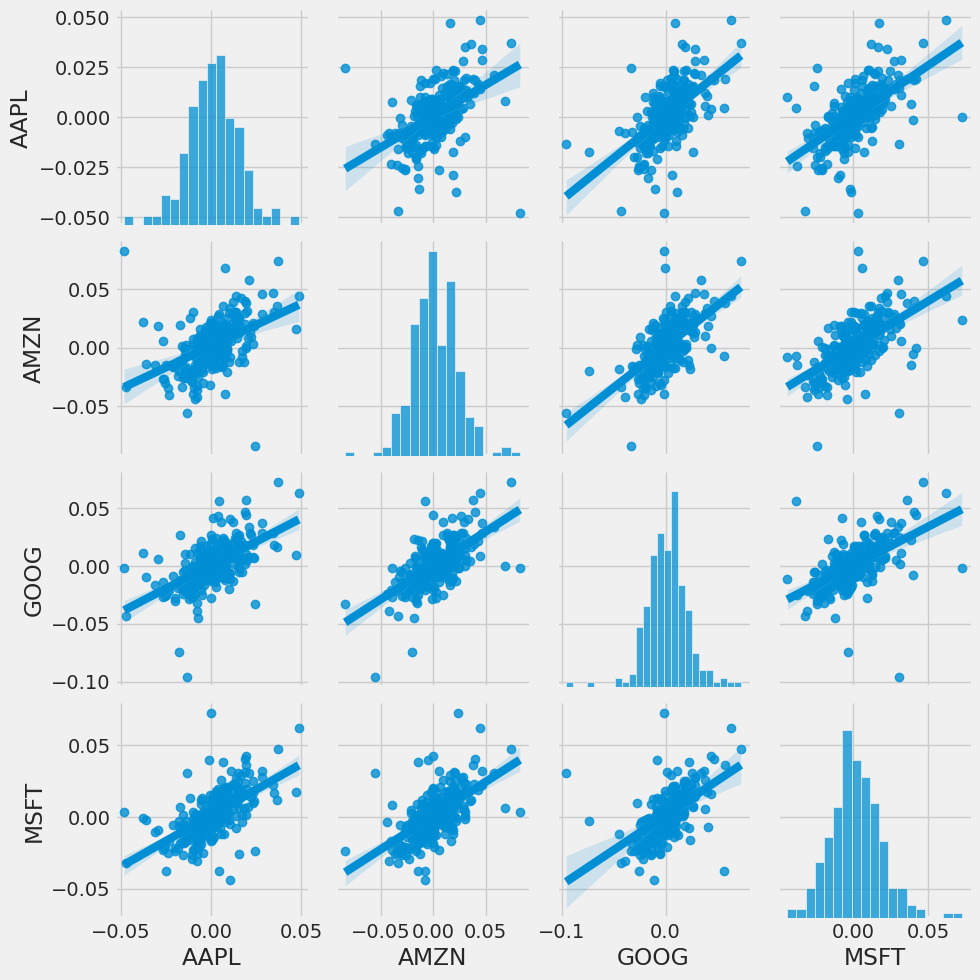

In [18]:


sns.pairplot(tech_rets, kind='reg')

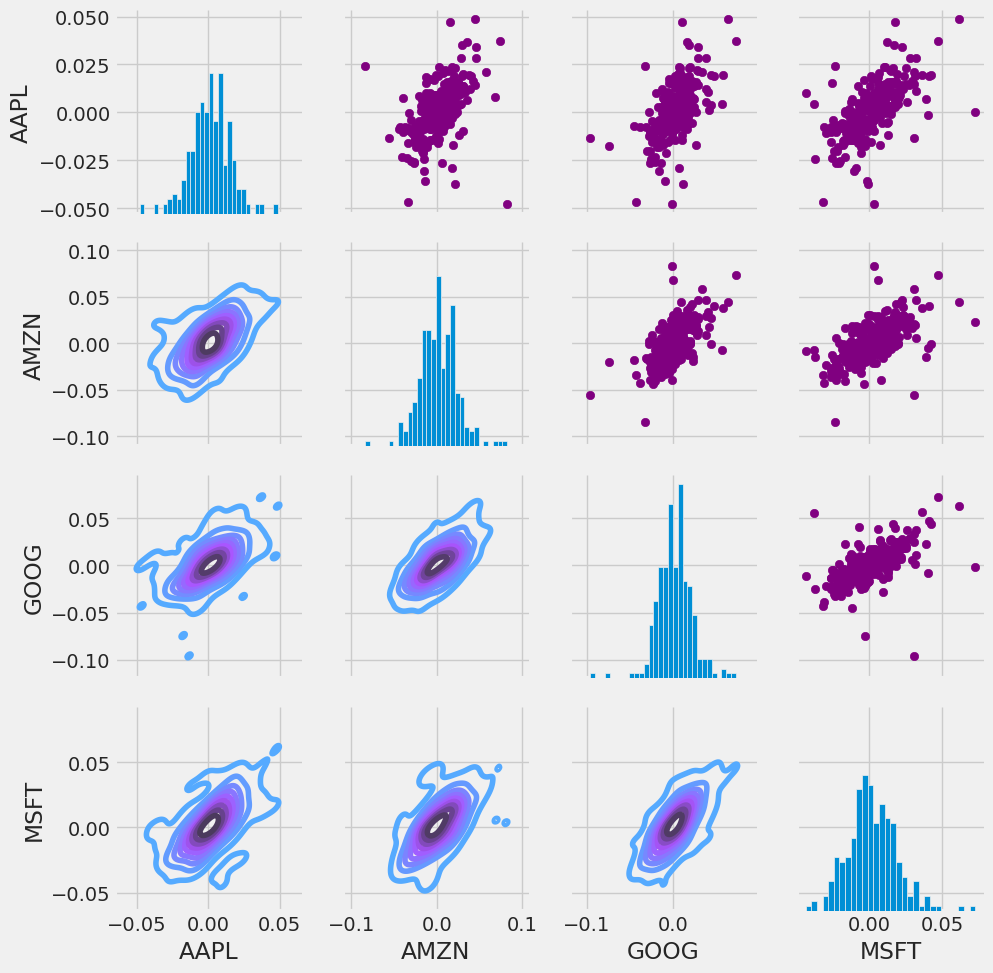

In [19]:
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

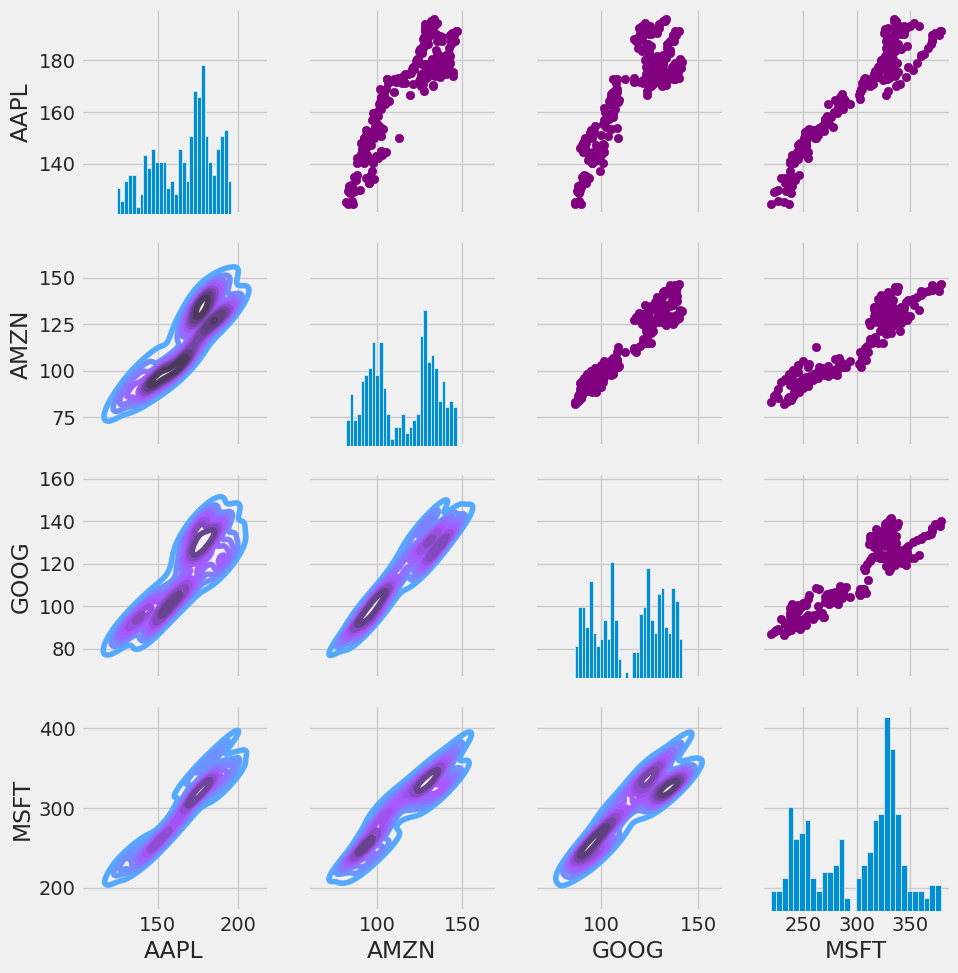

In [20]:
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

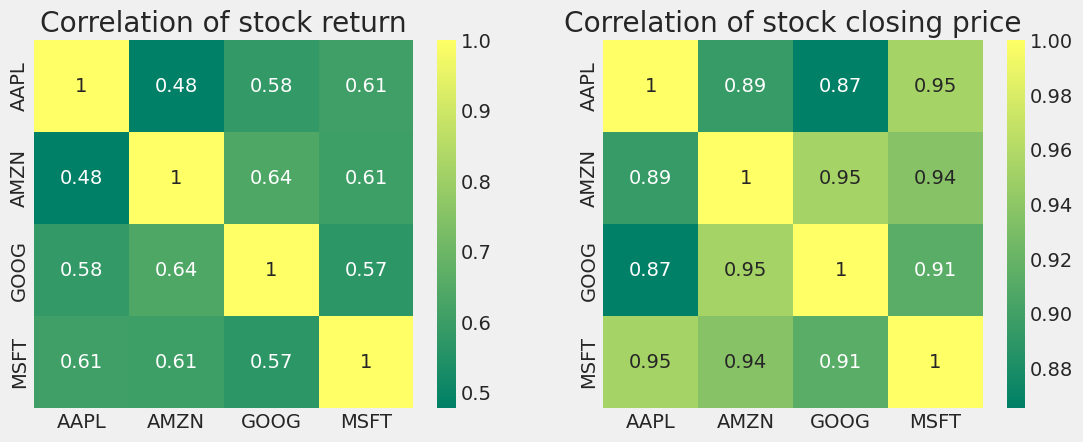

In [21]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

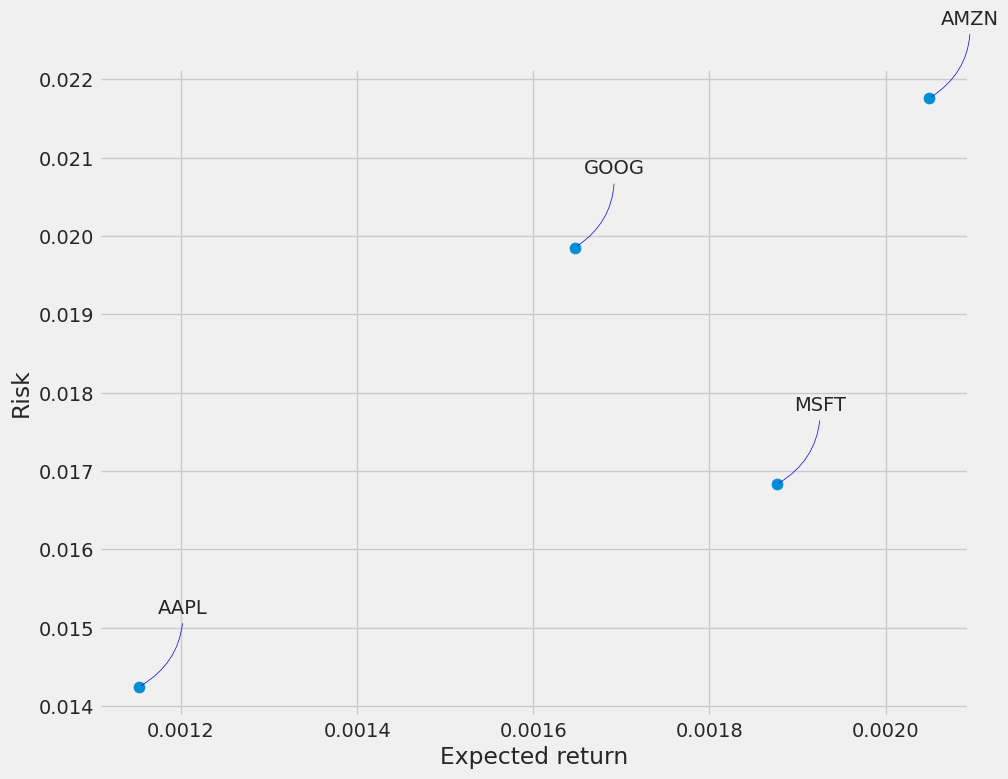

In [22]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [23]:
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449692,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516597,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655558,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787854,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767570,394024400
...,...,...,...,...,...,...
2023-11-16,189.570007,190.960007,188.649994,189.710007,189.710007,54412900
2023-11-17,190.250000,190.380005,188.570007,189.690002,189.690002,50922700
2023-11-20,189.889999,191.910004,189.880005,191.449997,191.449997,46505100


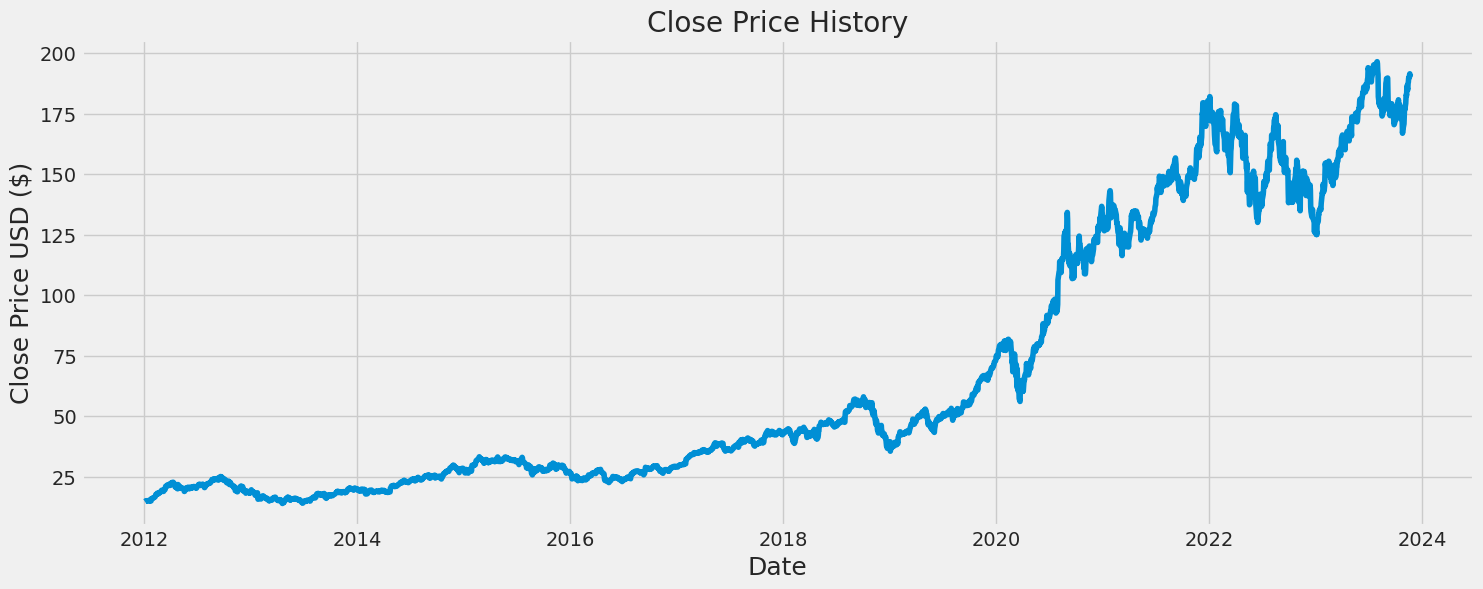

In [24]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [25]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2844

In [26]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.97260311],
       [0.96816483],
       [0.97183601]])

### split into Train data

In [27]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

### split into Test data

In [28]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

##Simple RNN model

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import SimpleRNN

simple_rnn_model = Sequential()
simple_rnn_model.add(
    SimpleRNN(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
simple_rnn_model.add(SimpleRNN(64, return_sequences=False))
simple_rnn_model.add(Dense(25))
simple_rnn_model.add(Dense(1))

# Compile the Simple RNN model
simple_rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Simple RNN model
simple_rnn_model.fit(x_train, y_train, batch_size=32, epochs=5)




Epoch 1/5
87/87 [==============================] - 5s 30ms/step - loss: 0.0346
Epoch 2/5
87/87 [==============================] - 3s 31ms/step - loss: 4.2309e-04
Epoch 3/5
87/87 [==============================] - 3s 31ms/step - loss: 4.0964e-04
Epoch 4/5
87/87 [==============================] - 4s 41ms/step - loss: 3.7218e-04
Epoch 5/5
87/87 [==============================] - 3s 37ms/step - loss: 2.9768e-04


In [30]:
predictions = simple_rnn_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:",rmse)

from sklearn.metrics import mean_squared_error
train = data[:training_data_len].copy()
valid = data[training_data_len:].copy()
valid.loc[:, 'Predictions'] = predictions
# Assuming 'predictions' and 'y_test' are the predicted and actual values respectively
mse = mean_squared_error(valid['Close'], valid['Predictions'])
print("MSE:", mse)




5/5 [==============================] - 0s 11ms/step
RMSE: 8.992649842807399
MSE: 80.86775119534394


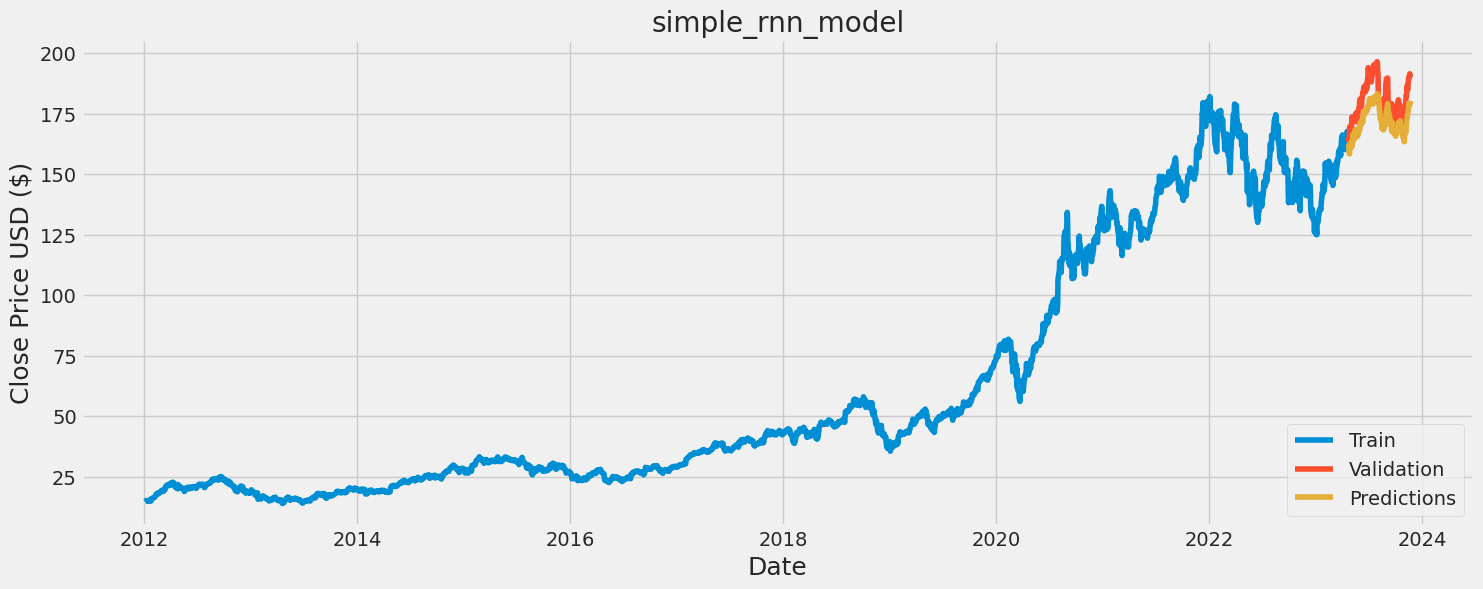

In [31]:
plt.figure(figsize=(16,6))
plt.title('simple_rnn_model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [32]:
print(valid)

                 Close  Predictions
Date                               
2023-04-24  165.330002   160.733292
2023-04-25  163.770004   161.896851
2023-04-26  163.759995   160.358414
2023-04-27  168.410004   158.366928
2023-04-28  169.679993   162.305374
...                ...          ...
2023-11-16  189.710007   177.349579
2023-11-17  189.690002   179.248322
2023-11-20  191.449997   178.672989
2023-11-21  190.639999   179.043594
2023-11-22  191.309998   180.161926

[149 rows x 2 columns]


## LSTM

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
87/87 [==============================] - 14s 115ms/step - loss: 0.0032
Epoch 2/5
87/87 [==============================] - 10s 114ms/step - loss: 3.5478e-04
Epoch 3/5
87/87 [==============================] - 8s 97ms/step - loss: 3.9596e-04
Epoch 4/5
87/87 [==============================] - 10s 116ms/step - loss: 3.2443e-04
Epoch 5/5
87/87 [==============================] - 10s 115ms/step - loss: 2.9421e-04


In [34]:
predic_tions = model.predict(x_test)
predic_tions = scaler.inverse_transform(predic_tions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predic_tions - y_test) ** 2)))
print("RMSE:",rmse)

from sklearn.metrics import mean_squared_error
train = data[:training_data_len].copy()
valid = data[training_data_len:].copy()
valid.loc[:, 'Predic_tions'] = predic_tions
# Assuming 'predictions' and 'y_test' are the predicted and actual values respectively
mse = mean_squared_error(valid['Close'], valid['Predic_tions'])
print("MSE:", mse)




5/5 [==============================] - 1s 40ms/step
RMSE: 5.583470072120749
MSE: 31.175138046268074


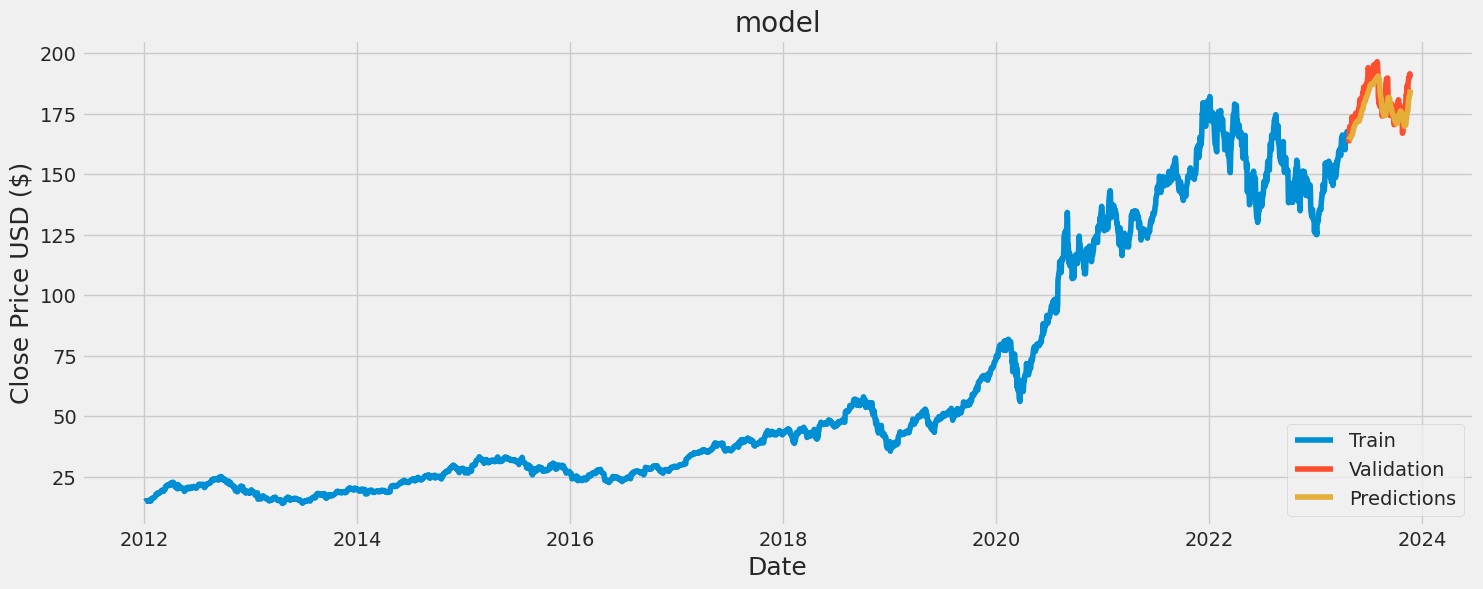

In [35]:
plt.figure(figsize=(16,6))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predic_tions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [36]:
print(valid)

                 Close  Predic_tions
Date                                
2023-04-24  165.330002    164.260864
2023-04-25  163.770004    164.449890
2023-04-26  163.759995    164.466248
2023-04-27  168.410004    164.370361
2023-04-28  169.679993    164.506302
...                ...           ...
2023-11-16  189.710007    180.283783
2023-11-17  189.690002    181.588242
2023-11-20  191.449997    182.780777
2023-11-21  190.639999    183.931778
2023-11-22  191.309998    184.916519

[149 rows x 2 columns]


## GRU

In [37]:
from keras.models import Sequential
from keras.layers import Dense, GRU



# Initialize the GRU model with tanh activation
model_gru = Sequential()
model_gru.add(GRU(64, return_sequences=True, input_shape=(x_train.shape[1], 1), activation='tanh'))
model_gru.add(GRU(64, return_sequences=False, activation='tanh'))
model_gru.add(Dense(32, activation='tanh'))
model_gru.add(Dense(1))

# Compile the GRU model
model_gru.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

# Train the GRU model
model_gru.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
87/87 [==============================] - 9s 60ms/step - loss: 0.0091 - accuracy: 3.5920e-04
Epoch 2/5
87/87 [==============================] - 4s 45ms/step - loss: 1.4388e-04 - accuracy: 3.5920e-04
Epoch 3/5
87/87 [==============================] - 4s 45ms/step - loss: 1.3185e-04 - accuracy: 3.5920e-04
Epoch 4/5
87/87 [==============================] - 5s 57ms/step - loss: 1.2855e-04 - accuracy: 3.5920e-04
Epoch 5/5
87/87 [==============================] - 4s 47ms/step - loss: 1.2112e-04 - accuracy: 3.5920e-04


In [38]:
predic__tions = model_gru.predict(x_test)
predic__tions = scaler.inverse_transform(predic__tions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predic__tions - y_test) ** 2)))
print("RMSE:",rmse)

from sklearn.metrics import mean_squared_error
train = data[:training_data_len].copy()
valid = data[training_data_len:].copy()
valid.loc[:, 'Predic__tions'] = predic__tions
# Assuming 'predictions' and 'y_test' are the predicted and actual values respectively
mse = mean_squared_error(valid['Close'], valid['Predic__tions'])
print("MSE:", mse)


5/5 [==============================] - 1s 24ms/step
RMSE: 4.613913591571647
MSE: 21.28819863048957


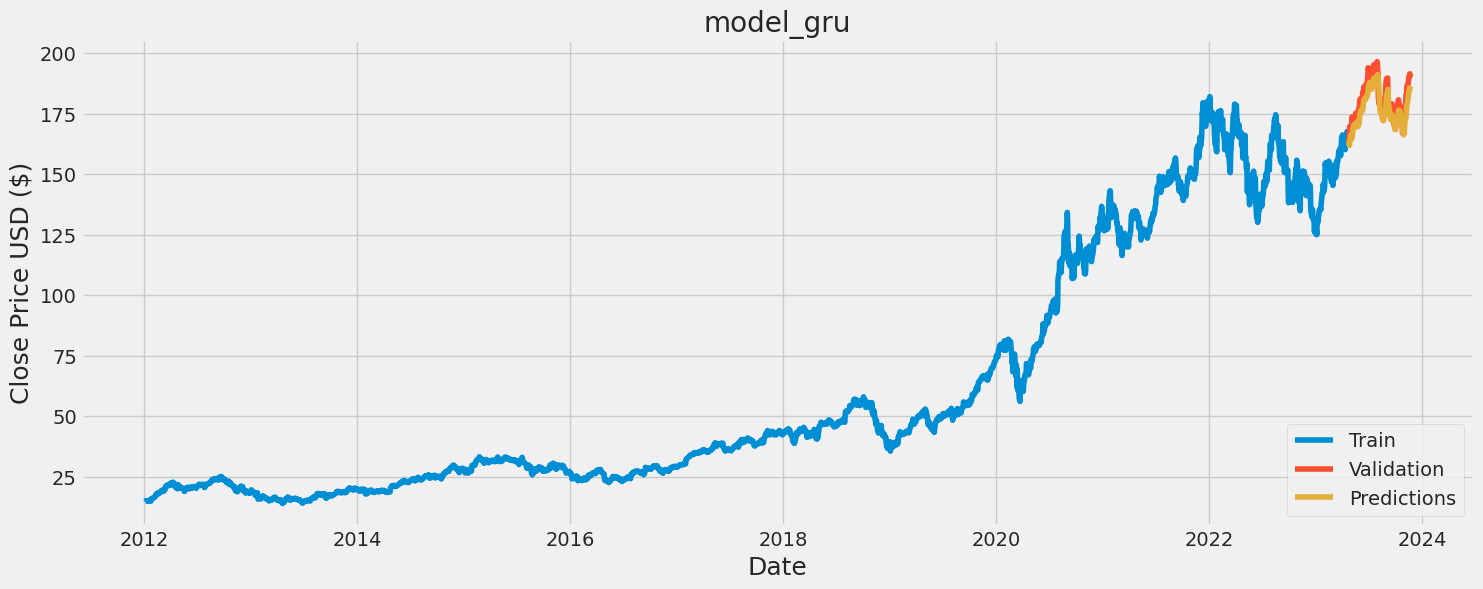

In [39]:
plt.figure(figsize=(16,6))
plt.title('model_gru')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predic__tions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [40]:
print(valid)

                 Close  Predic__tions
Date                                 
2023-04-24  165.330002     163.595978
2023-04-25  163.770004     163.196747
2023-04-26  163.759995     162.396271
2023-04-27  168.410004     161.857651
2023-04-28  169.679993     163.406250
...                ...            ...
2023-11-16  189.710007     183.193344
2023-11-17  189.690002     184.412216
2023-11-20  191.449997     185.129105
2023-11-21  190.639999     186.161652
2023-11-22  191.309998     186.470261

[149 rows x 2 columns]
